In [35]:
import pandas as pd
import matplotlib.pyplot as plt

En primer lugar seleccionamos el archivo que deseamos analizar en formato csv y lo transformamos a DataFrame. Usamos la primera columna de nuestro csv como ínidice.

In [36]:
df = pd.read_csv('barcelona-capital_alquiler.csv', index_col=0)
df


,Preu,Habitacions,Banys,Metres quadrats,Zona,Tipo
0,2100.0,3.0,2.0,142.0,"Dels Madrazo, Sarrià - Sant Gervasi",Piso
1,1150.0,3.0,1.0,68.0,"Carrer D'aragó, Eixample",Piso
2,1750.0,2.0,1.0,90.0,"Comte Borrell, Eixample",Piso
3,1200.0,1.0,1.0,60.0,"Mata, Sants - Montjuïc",Piso
4,1150.0,3.0,1.0,70.0,"Carrer D'aragó, Eixample",Piso
...,...,...,...,...,...,...
2666,1100.0,2.0,1.0,72.0,"Carrer Alcalde de Mostoles (l´), Gràcia",Ático
2667,910.0,3.0,1.0,100.0,"Tisso, Nou Barris",Ático
2668,705.0,2.0,1.0,50.0,"Carrer Dels Agullers, Ciutat Vella",Piso
2669,850.0,Null,1.0,37.0,"Carrer Argenter (l´), Eixample",Piso


A continuación nos fijaremos en el tipo de datos de cada columna y realizaremos los cambios necesarios para dejar cada columna en el formato que nos vaya mejor para realizar un analisis. En este caso las columnas Preu, Habitacions, Banys i Metres quadrats tienen que estar en un formato número ya sea int o float. Vemos que el nombre de la columna Metres quadrats, contiene un espacio. Este hecho puede provocar errores en el código por tato adaptaremos su nombre para que sea mas sencillo hacer referencia a esta columa

In [37]:
print(df.dtypes)
num_col = ['Preu', 'Habitacions', 'Banys', 'm2']
df = df.rename({'Metres quadrats':'m2'},axis=1)
df = df[pd.to_numeric(df.Preu, errors = "coerce").notnull()]
df = df[pd.to_numeric(df.Habitacions, errors = "coerce").notnull()]
df = df[pd.to_numeric(df.Banys, errors = "coerce").notnull()] 
df = df[pd.to_numeric(df.m2, errors = "coerce").notnull()]
 
for i in num_col:
    df[i] = df[[i]].apply(pd.to_numeric)
print(df.dtypes)

Preu               object
Habitacions        object
Banys              object
Metres quadrats    object
Zona               object
Tipo               object
dtype: object
Preu           float64
Habitacions    float64
Banys          float64
m2             float64
Zona            object
Tipo            object
dtype: object


Añadimos una columna que llamaremos r_m2 que sera el resultado de divir el precio de alquiler entre los metros cuadrados de cada vivienda. Con este valor determinamos la retabilidad por metro quadrado

In [38]:
df['r_m2'] = df['Preu'] / df['m2']
df

,Preu,Habitacions,Banys,m2,Zona,Tipo,r_m2
0,2100.0,3.0,2.0,142.0,"Dels Madrazo, Sarrià - Sant Gervasi",Piso,14.788732
1,1150.0,3.0,1.0,68.0,"Carrer D'aragó, Eixample",Piso,16.911765
2,1750.0,2.0,1.0,90.0,"Comte Borrell, Eixample",Piso,19.444444
3,1200.0,1.0,1.0,60.0,"Mata, Sants - Montjuïc",Piso,20.000000
4,1150.0,3.0,1.0,70.0,"Carrer D'aragó, Eixample",Piso,16.428571
...,...,...,...,...,...,...,...
2665,750.0,2.0,1.0,55.0,"Carrer de Perafita, Nou Barris",Piso,13.636364
2666,1100.0,2.0,1.0,72.0,"Carrer Alcalde de Mostoles (l´), Gràcia",Ático,15.277778
2667,910.0,3.0,1.0,100.0,"Tisso, Nou Barris",Ático,9.100000
2668,705.0,2.0,1.0,50.0,"Carrer Dels Agullers, Ciutat Vella",Piso,14.100000


En este punto consideramos que nuestros datos estan limpios y podemos empezar con el análisis. En primer lugar veremos una descripción general de nuestros datos

In [39]:
df.describe()

,Preu,Habitacions,Banys,m2,r_m2
count,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000
mean,2515.079373,2.903969,1.898579,116.662420,22.579426
std,2196.122601,1.136553,1.030897,102.781074,10.831767
min,561.000000,1.000000,1.000000,12.000000,6.000000
25%,1300.000000,2.000000,1.000000,68.000000,15.486726
50%,1800.000000,3.000000,2.000000,86.000000,19.936170
75%,2800.000000,3.000000,2.000000,130.000000,26.666667
max,25000.000000,13.000000,9.000000,2000.000000,125.000000


Fijandonos en la descripción superficial, vemos que el maximo valor de las columnas es un poco desorbitado comparado con sus medias de manera que realizamos un grafico de caja para ver la distribución de los datos. Nos basaremos en la columna de precio.

<AxesSubplot:>

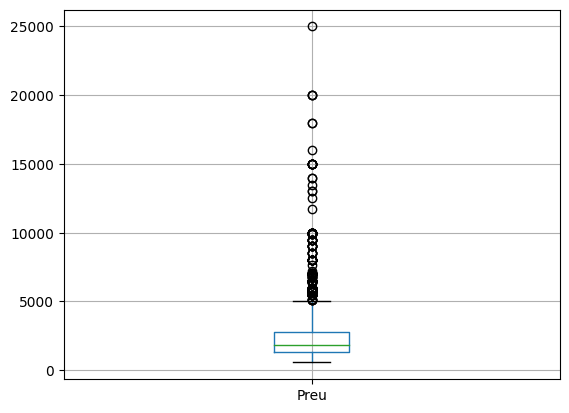

In [40]:
df.boxplot(column='Preu')

El grafico muestra que tenemos valores muy por encima de los valores típicos. Filtraremos los valores de nuestra base de datos en base al precio, dejando de lado para el analisis los valores que se encuentre en el 10% superior.

        Preu  Habitacions  Banys     m2  \
69    4500.0          4.0    4.0  215.0   
107   5000.0          2.0    1.0   85.0   
148   4900.0          3.0    3.0  175.0   
180   4500.0          4.0    3.0  374.0   
219   5000.0          4.0    4.0  524.0   
...      ...          ...    ...    ...   
2544  5000.0          5.0    4.0  300.0   
2562  5000.0          5.0    5.0  275.0   
2571  5000.0          5.0    5.0  322.0   
2575  5000.0          4.0    8.0  314.0   
2576  5000.0          5.0    4.0  318.0   

                                                 Zona          Tipo       r_m2  
69      Carrer del Doctor Roux, Sarrià - Sant Gervasi          Piso  20.930233  
107                   Carrer de Ramón y Cajal, Gràcia        Dúplex  58.823529  
148                 Avinguda Diagonal, 489, Les Corts          Piso  28.000000  
180   Carrer de Josep Bertrand, Sarrià - Sant Gervasi          Piso  12.032086  
219                  Avinguda de Pedralbes, Les Corts          Piso   9.541985

,Preu,Habitacions,Banys,m2,r_m2
count,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000
mean,1842.067499,2.738514,1.676687,95.266591,20.908062
std,754.866489,0.941674,0.725611,47.802711,8.156001
min,561.000000,1.000000,1.000000,12.000000,6.000000
25%,1250.000000,2.000000,1.000000,65.000000,15.091766
50%,1650.000000,3.000000,2.000000,81.000000,18.902439
75%,2300.000000,3.000000,2.000000,107.000000,24.633333
max,3995.000000,8.000000,8.000000,392.000000,77.777778


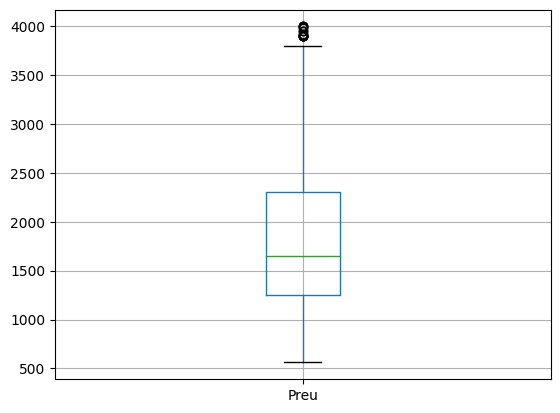

In [46]:
q95 = df.Preu.quantile(0.95)
df = df[df.Preu < q95]
df.boxplot(column = 'Preu')
df.describe()

Después de eliminar el 5% de los valores con los precios mas extremos, la desviación estandar se ha visto reducida en mas de un 50% de manera que parece que hemos eliminados algunos de los outliers.
El siguiente paso es determinar el tipo de vivienda que se alquila a un mayor precio y el que ofrece un tipo de retabilidad por metro quadrado mas alta

<AxesSubplot:xlabel='Tipo'>

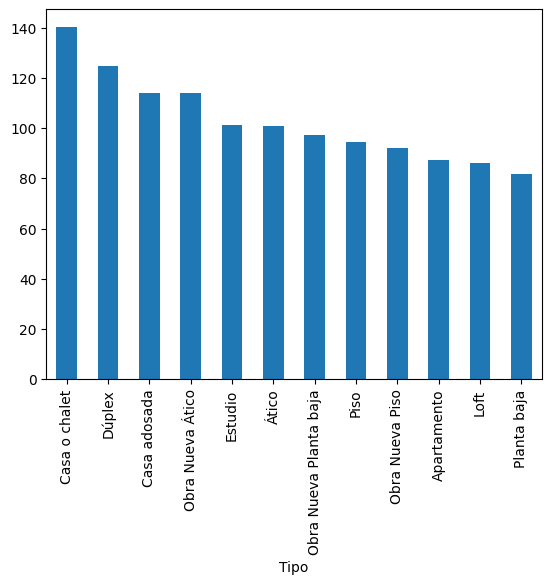

In [59]:
df.groupby('Tipo')['m2'].mean().sort_values(ascending=False).plot(kind='bar')

Determinamos que el tipo de vivienda con mayor rentabilidad por metro quadrado son las casas seguido de duplex, casa adosada y atico de obra nueva. A continuación estudiaremos cual es la oferta.

<AxesSubplot:>

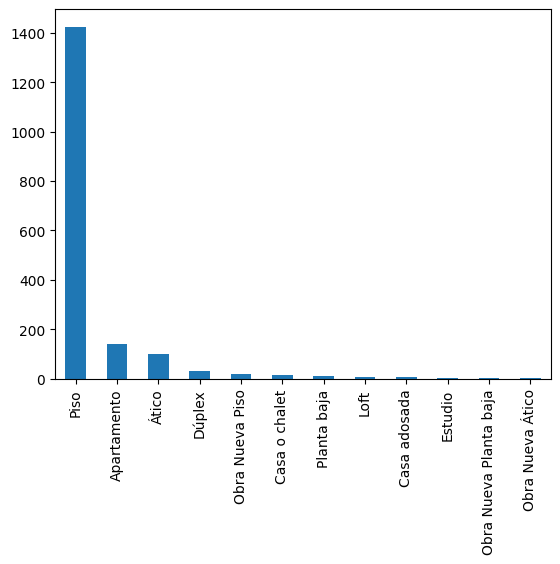

In [60]:
fig, ax = plt.subplots()
df['Tipo'].value_counts().plot(ax=ax, kind='bar')

La freqüencia indica que los pisos tiene  la mayor oferta de alquileres seguido de apartamentos y áticos. Para el resto de tipos de vivienda, la cantidad de datos analizada es demasiado baja para incluirlos en nuestro estudio de manera que nos centraremos únicamente en estos 3 tipos de vivienda

<AxesSubplot:xlabel='Tipo'>

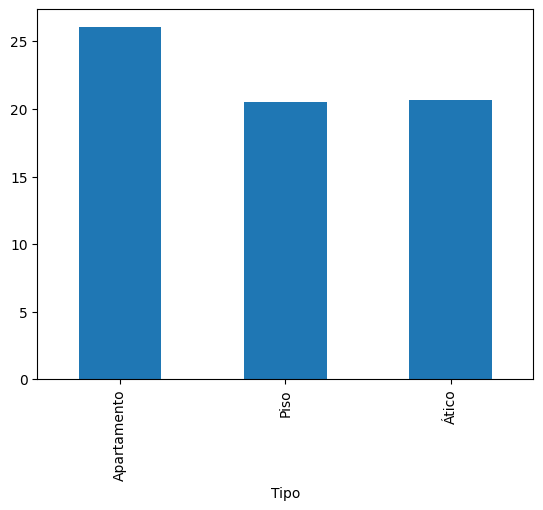

In [64]:
df = df[df['Tipo'].isin(['Piso', 'Apartamento', 'Ático'])]
df.groupby('Tipo')['r_m2'].mean().plot(kind='bar')

Centrandonos en estos tres tipos de vivienda, la rentabilidad mas alta es la de los apartamentos que es aproximadamente de 25 € por metro cuadrado mientras que tanto la de los pisos como la de los áticos es de 20 € por metro cuadrado. Es sorprendente que la rentabilidad de un piso y de un ático se encuentren a la par cuando en principio, esperaríamos un mayor retorno por metro cuandrado por parte de los áticos